In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load datasets from basically ../../Dataset
train_data = pd.read_csv('../../Dataset/train_data_cleaned.csv')
val_data = pd.read_csv('../../Dataset/val_data_cleaned.csv')
test_data = pd.read_csv('../../Dataset/test_data_cleaned.csv')

all_data = pd.concat([train_data, val_data, test_data], ignore_index=True)

In [3]:
# Combine title and text into one column
all_data["content"] = all_data["title"].fillna("") + " " + all_data["text"].fillna("")

In [4]:
all_data

,id,title,text,label,content
0,6026,"Whether Clinton or Trump, Tensions Will Escala...",by Jerri-Lynn Scofield \nJerri-Lynn here: Ther...,0,"Whether Clinton or Trump, Tensions Will Escala..."
1,1553,"If this is what a “Rubio surge” looks like, Re...","On one hand, it is yet another example of how ...",1,"If this is what a “Rubio surge” looks like, Re..."
2,2581,Boehner moves to push off immigration fight to...,House Speaker John Boehner announced plans Tue...,1,Boehner moves to push off immigration fight to...
3,9374,Police Depts. Paid AT&T Millions To Scrutinize...,"Edmondo Burr in News , US // 0 Comments Adam...",0,Police Depts. Paid AT&T Millions To Scrutinize...
4,4448,Poll: 6 in 10 Back Renewal of NSA Data Collection,With the provisions of the Patriot Act which a...,1,Poll: 6 in 10 Back Renewal of NSA Data Collect...
...,...,...,...,...,...
6005,220,The right turns on Paul Ryan: Yesterday’s cons...,Rush Limbaugh: “I don’t remember a vice presid...,1,The right turns on Paul Ryan: Yesterday’s cons...
6006,7211,"“We are losing control of the streets,” say po...",BNI Store Nov 2 2016 “We are losing control of...,0,"“We are losing control of the streets,” say po..."
6007,3652,"FBI: Orlando suspect U.S. citizen, vowed alleg...","PORT ST. LUCIE, Fla. — Investigators were revi...",1,"FBI: Orlando suspect U.S. citizen, vowed alleg..."
6008,6239,"Meter Reader Knocks On Man’s Door, Reveals Sin...",Share This \nWhen a man heard a knock on his d...,0,"Meter Reader Knocks On Man’s Door, Reveals Sin..."


In [5]:
# Verify that the data is loaded correctly
print(f"Total articles: {len(all_data)}")
print(all_data.head())

Total articles: 6010
     id                                              title  \
0  6026  Whether Clinton or Trump, Tensions Will Escala...   
1  1553  If this is what a “Rubio surge” looks like, Re...   
2  2581  Boehner moves to push off immigration fight to...   
3  9374  Police Depts. Paid AT&T Millions To Scrutinize...   
4  4448  Poll: 6 in 10 Back Renewal of NSA Data Collection   

                                                text  label  \
0  by Jerri-Lynn Scofield \nJerri-Lynn here: Ther...      0   
1  On one hand, it is yet another example of how ...      1   
2  House Speaker John Boehner announced plans Tue...      1   
3    Edmondo Burr in News , US // 0 Comments Adam...      0   
4  With the provisions of the Patriot Act which a...      1   

                                             content  
0  Whether Clinton or Trump, Tensions Will Escala...  
1  If this is what a “Rubio surge” looks like, Re...  
2  Boehner moves to push off immigration fight to...  
3  Poli

In [6]:
# Preprocessing function
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

In [7]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [8]:
all_data["cleaned_content"] = all_data["content"].apply(preprocess_text)

In [9]:
# Verify that the preprocessing is done correctly
print(all_data["cleaned_content"].head())

0    whether clinton or trump tensions will escalat...
1    if this is what a rubio surge looks like repub...
2    boehner moves to push off immigration fight to...
3    police depts paid att millions to scrutinize o...
4    poll in back renewal of nsa data collection wi...
Name: cleaned_content, dtype: object


In [10]:
# Step 1: Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
tfidf_matrix = tfidf.fit_transform(all_data["cleaned_content"])

In [11]:
# Step 2: Apply K-Means clustering
k= 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(tfidf_matrix)

In [12]:
# Step 3: Evaluate the clustering
silhouette_score_tfidf = silhouette_score(tfidf_matrix, labels)
print(f"Silhouette Score (TF-IDF): {silhouette_score_tfidf:.2f}")

Silhouette Score (TF-IDF): 0.01


In [13]:
# Visualize top terms per cluster
terms = tfidf.get_feature_names_out()
for i in range(k):
    print(f"Cluster {i} top terms: ")
    cluster_center = kmeans.cluster_centers_[i]
    top_terms = cluster_center.argsort()[-10:][::-1]
    print(", ".join(terms[top_terms]))

Cluster 0 top terms: 
trump, clinton, said, sanders, campaign, trumps, donald, hillary, republican, cruz
Cluster 1 top terms: 
said, people, clinton, obama, new, state, president, hillary, police, government


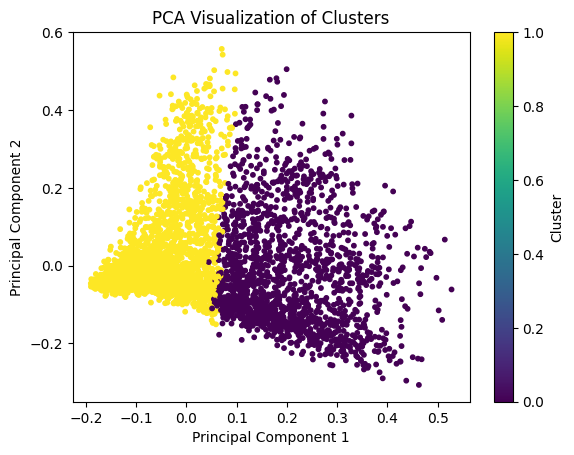

In [14]:
# Step 4: Optional Visualization with PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
plt.title("PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [15]:
# Analyze cluster distribution
all_data["cluster"] = labels
print(all_data.groupby("cluster").size())

cluster
0    1645
1    4365
dtype: int64


In [16]:
# Save results to CSV for further analysis
all_data[["id", "title", "text", "label", "cluster"]].to_csv("clustering_results.csv", index=False)
print("Clustering results saved to clustering_results.csv")

Clustering results saved to clustering_results.csv


In [17]:
# Let's also calculate the accuracy of the clustering, because in the all_data we have the label of the article and compare it with the cluster
# We can calculate the accuracy
accuracy = sum(all_data["label"] == all_data["cluster"]) / len(all_data)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.38
